## Lesson 5 - Data manipulation with pandas

**Before anything, the packages that may be need to be imported**

```python
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os #a module for the system on the computer
```

**Importing a file containing data from the computer**

```python 
pwd = os.getcwd() # get the working directory
filepath = pwd + " " # you create a path of the file you want to import with the / .
#This path can be used for other data 
df=pd.read_csv(filepath) #pass in the filepath and read the file 
df # read the data
```
**Getting information on the data** 

```python
df.head() # get the first 5 roles the data 
df.tail() # get the last 5 roles of the data 
df.describe() 
df.shape
df.nunique()
df.info()
df.columns() 
df["output"].unique() # this is to see the uniqueness of a certain column
```
**Data manipulation and the loc and iloc method**

```python
df_1 = df.iloc [1:10,1:5] # this is to slecet specific rows and columns. This is only for integers
df_1
df_2 = df.loc[ 1:10, ["sex", "chol", "slp", "output"]]  # this is a slicing method for integers and strings
df_2
```
-> Different ways to rename columns with capital letters 

```python
df.rename(columns={"output": "OUTPUT", "sex": "SEX"}, inplace=True) #this is to change the variable title into caps
cols = [column.upper() for column in df.columns]   #list comprehension. a one liner for a for loop.
#this is to change the whole column into capital letters
df.columns = cols
cols = [column.title() for column in df.columns] #this is to get the columns first letter in capitals
df.columns = cols
df #make sure to call the df 
```
**Data filtering with specific criteria**
There are two ways of filtering through the data 
First way 
```python 
#Filtering through the data with specific criteria: 2 ways 
flt_age_chol = (df["Age"] > 67) & (df["Chol"] > 200) #this is one way to go about it by storing the criteria in a variable 
df[flt_age_chol] #pass the variable inside the function of the dataframe to filter your data
```
Second way
```python
df[(df["Age"] > 67) & (df["Chol"] > 200)] #alternative to the first option, the filtering criteria can be passed straight into the df 
```
**Data grouping by a specific variable**

```python
df.groupby("Sex").mean() #this will group the data and show the means of all the other variables based on the Sex
```


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os 

In [2]:
pwd = os.getcwd()

In [3]:
pwd

'/Users/felixeffah/Desktop/Data Analysis with Pythob/Final Year Python - Cambridge'

In [4]:
filepath = pwd + "/Data/heart.csv"
filepath

'/Users/felixeffah/Desktop/Data Analysis with Pythob/Final Year Python - Cambridge/Data/heart.csv'

In [5]:
df=pd.read_csv(filepath)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.describe() #decriptive statistics on the numerical columns of the dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.nunique() #gives an unique description of each columns

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [12]:
df["output"].unique() # this is to see the uniqueness of a certain column

array([1, 0])

In [15]:
df_1 = df.iloc [1:10,1:5] # this is to slecet specific rows and columns. This is only for integers
df_1



,sex,cp,trtbps,chol
1,1,2,130,250
2,0,1,130,204
3,1,1,120,236
4,0,0,120,354
5,1,0,140,192
6,0,1,140,294
7,1,1,120,263
8,1,2,172,199
9,1,2,150,168


In [16]:
df_2 = df.loc[ 1:10, ["sex", "chol", "slp", "output"]]  # this is a slicing method for integers and strings
df_2

,sex,chol,slp,output
1,1,250,0,1
2,0,204,2,1
3,1,236,2,1
4,0,354,2,1
5,1,192,1,1
6,0,294,1,1
7,1,263,2,1
8,1,199,2,1
9,1,168,2,1
10,1,239,2,1


In [21]:
df_columns = df.columns
df_columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [23]:
df.rename(columns={"output": "OUTPUT", "sex": "SEX"}, inplace=True) #this is to change the variable title into caps
df

,age,SEX,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
cols = [column.upper() for column in df.columns]   #list comprehension. a one liner for a for loop.
#this is to change the whole column into capital letters
df.columns = cols
df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
df.columns

Index(['AGE', 'SEX', 'CP', 'TRTBPS', 'CHOL', 'FBS', 'RESTECG', 'THALACHH',
       'EXNG', 'OLDPEAK', 'SLP', 'CAA', 'THALL', 'OUTPUT'],
      dtype='object')

In [27]:
cols = [column.title() for column in df.columns] #this is to get the columns first letter in capitals
df.columns = cols
df

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
#Filtering through the data with specific criteria

flt_age_chol = (df["Age"] > 67) & (df["Chol"] > 200) #this is one way to go about it by storing the criteria in a variable 

df[flt_age_chol] #pass the variable inside the function of the dataframe to filter your data

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0


In [33]:
df[(df["Age"] > 67) & (df["Chol"] > 200)] #alternative to the first option, the filtering criteria can be passed straight into the df

,Age,Sex,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0


In [43]:
Male_filter = df[(df["Age"]> 55) & (df["Chol"]>150) & (df["Sex"] == 1)]
Male_filter

data_clean = Male_filter.loc[1:97,["Age", 'Sex', 'Trtbps', 'Chol']]
data_clean
data_clean.columns = ["AGE", "SEX", "TRTBPS", "CHOL"] # this is to rename the columns of the data 
data_clean

,AGE,SEX,TRTBPS,CHOL
3,56,1,120,236
5,57,1,140,192
9,57,1,150,168
13,64,1,110,211
20,59,1,135,234
23,61,1,150,243
26,59,1,150,212
31,65,1,120,177
51,66,1,120,302
52,62,1,130,231


In [44]:
#How to group data by a specific variable 
df.groupby('Sex').mean()



,Age,Cp,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
Sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [47]:
df.groupby('Cp').mean()

,Age,Sex,Trtbps,Chol,Fbs,Restecg,Thalachh,Exng,Oldpeak,Slp,Caa,Thall,Output
Cp,,,,,,,,,,,,,
0,55.692308,0.727273,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.383217,1.258741,0.965035,2.447552,0.272727
1,51.360000,0.640000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.316000,1.680000,0.420000,2.140000,0.820000
2,53.517241,0.597701,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.797701,1.505747,0.586207,2.206897,0.793103
3,55.869565,0.826087,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,1.391304,1.260870,0.478261,2.260870,0.695652


<AxesSubplot:>

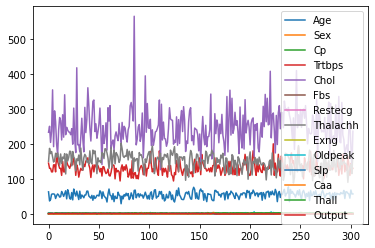

In [50]:
df.plot()

<AxesSubplot:xlabel='Sex'>

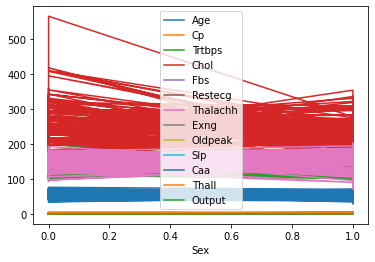

In [51]:
df.plot('Sex')

<AxesSubplot:>

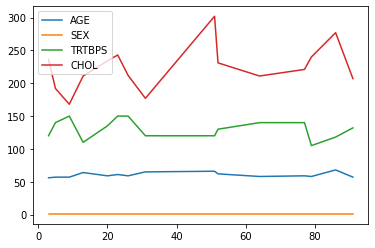

In [52]:
data_clean.plot()